<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_6_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.066879,82.033287,50.508529,-2283.271421,-2059.662727,318.031363,-2377.694090
1,0.0,1.0,97.349629,90.121468,42.039795,681.047828,920.558721,401.601042,518.957679
2,0.0,2.0,56.529948,47.367329,72.621427,-100.564301,85.954403,162.014195,-76.059792
3,0.0,3.0,49.700271,27.089189,50.138885,78.073681,215.002025,44.398229,170.603795
4,0.0,4.0,46.776146,78.796610,32.646174,-149.338707,18.880222,106.165177,-87.284954
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.935418,99.074489,40.703807,-1358.161522,-1155.447807,-68.729586,-1086.718222
249996,999.0,246.0,54.387283,82.861188,61.030344,-915.303982,-707.025167,30.296750,-737.321917
249997,999.0,247.0,78.559519,46.143737,67.131937,610.221372,812.056565,281.300754,530.755810
249998,999.0,248.0,55.238539,73.190996,34.359053,-373.368670,-200.580082,23.303567,-223.883649


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.066879,82.033287,50.508529,-2283.271421,-2059.662727,318.031363,-2377.694090
1,0.0,1.0,97.349629,90.121468,42.039795,681.047828,920.558721,401.601042,518.957679
2,0.0,2.0,56.529948,47.367329,72.621427,-100.564301,85.954403,162.014195,-76.059792
3,0.0,3.0,49.700271,27.089189,50.138885,78.073681,215.002025,44.398229,170.603795
4,0.0,4.0,46.776146,78.796610,32.646174,-149.338707,18.880222,106.165177,-87.284954
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.935418,99.074489,40.703807,-1358.161522,-1155.447807,-68.729586,-1086.718222
249996,999.0,246.0,54.387283,82.861188,61.030344,-915.303982,-707.025167,30.296750,-737.321917
249997,999.0,247.0,78.559519,46.143737,67.131937,610.221372,812.056565,281.300754,530.755810
249998,999.0,248.0,55.238539,73.190996,34.359053,-373.368670,-200.580082,23.303567,-223.883649


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    81.066879  82.033287  ...  318.031363 -2377.694090
      1.0    97.349629  90.121468  ...  401.601042   518.957679
      2.0    56.529948  47.367329  ...  162.014195   -76.059792
      3.0    49.700271  27.089189  ...   44.398229   170.603795
      4.0    46.776146  78.796610  ...  106.165177   -87.284954
...                ...        ...  ...         ...          ...
999.0 245.0  52.935418  99.074489  ...  -68.729586 -1086.718222
      246.0  54.387283  82.861188  ...   30.296750  -737.321917
      247.0  78.559519  46.143737  ...  281.300754   530.755810
      248.0  55.238539  73.190996  ...   23.303567  -223.883649
      249.0  83.090153  57.057357  ...  309.692415  -244.137872

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    81.066879  82.033287  ...  318.031363 -2377.694090
      1.0    97.349629  90.121468  ...  401.601042   518.957679
      2.0    56.529948  47.367329  ...  162.014195   -76.059792
      3.0    49.700271  27.089189  ...   44.398229   170.603795
      4.0    46.776146  78.796610  ...  106.165177   -87.284954
...                ...        ...  ...         ...          ...
999.0 245.0  52.935418  99.074489  ...  -68.729586 -1086.718222
      246.0  54.387283  82.861188  ...   30.296750  -737.321917
      247.0  78.559519  46.143737  ...  281.300754   530.755810
      248.0  55.238539  73.190996  ...   23.303567  -223.883649
      249.0  83.090153  57.057357  ...  309.692415  -244.137872

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.066879,82.033287,50.508529,-2283.271421,-2059.662727,318.031363,-2377.694090
1,0.0,1.0,97.349629,90.121468,42.039795,681.047828,920.558721,401.601042,518.957679
2,0.0,2.0,56.529948,47.367329,72.621427,-100.564301,85.954403,162.014195,-76.059792
3,0.0,3.0,49.700271,27.089189,50.138885,78.073681,215.002025,44.398229,170.603795
4,0.0,4.0,46.776146,78.796610,32.646174,-149.338707,18.880222,106.165177,-87.284954
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.935418,99.074489,40.703807,-1358.161522,-1155.447807,-68.729586,-1086.718222
249996,999.0,246.0,54.387283,82.861188,61.030344,-915.303982,-707.025167,30.296750,-737.321917
249997,999.0,247.0,78.559519,46.143737,67.131937,610.221372,812.056565,281.300754,530.755810
249998,999.0,248.0,55.238539,73.190996,34.359053,-373.368670,-200.580082,23.303567,-223.883649


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    81.066879  82.033287  ...  318.031363 -2377.694090
      1.0    97.349629  90.121468  ...  401.601042   518.957679
      2.0    56.529948  47.367329  ...  162.014195   -76.059792
      3.0    49.700271  27.089189  ...   44.398229   170.603795
      4.0    46.776146  78.796610  ...  106.165177   -87.284954
...                ...        ...  ...         ...          ...
999.0 245.0  52.935418  99.074489  ...  -68.729586 -1086.718222
      246.0  54.387283  82.861188  ...   30.296750  -737.321917
      247.0  78.559519  46.143737  ...  281.300754   530.755810
      248.0  55.238539  73.190996  ...   23.303567  -223.883649
      249.0  83.090153  57.057357  ...  309.692415  -244.137872

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

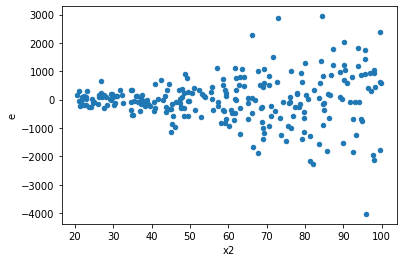

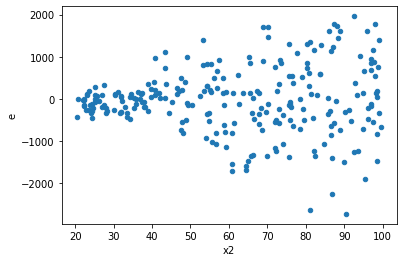

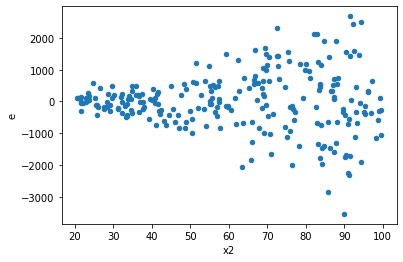

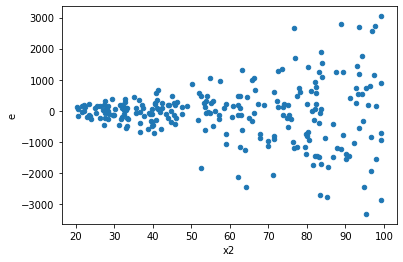

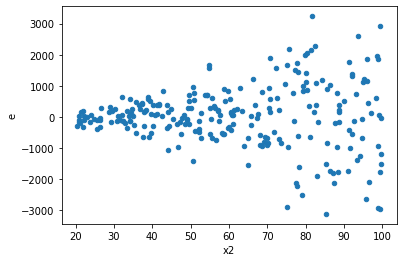

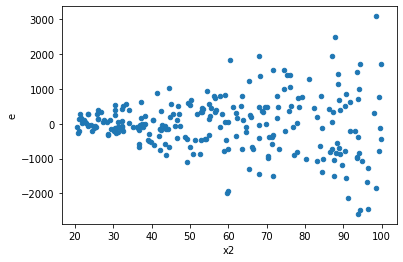

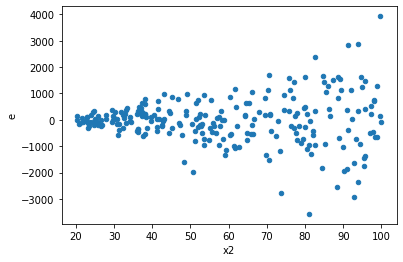

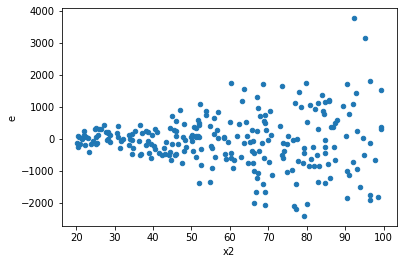

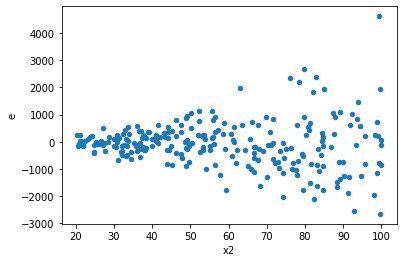

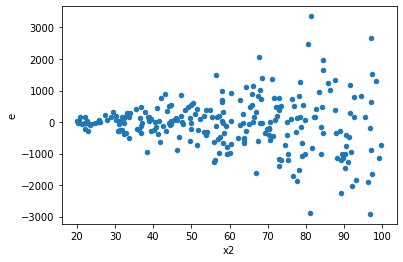

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,127031889.68301098,11235927.987587234,1323248.8508646977,117040.91653736703,11.305865418801904,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,96854768.04757094,13316615.267510504,1008903.833828864,138714.74236990107,7.273227175367484,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,156988569.10832745,15431068.204359517,1635297.594878411,160740.29379541162,10.173538670769126,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,171211537.63645095,7403862.532347946,1783453.517046364,77123.5680452911,23.124624057836954,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,209552885.8630626,15572570.058012316,2182842.5610735686,162214.27143762828,13.456538328767676,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,118075088.85901622,11419181.715796722,1229948.842281419,118949.80953954918,10.340065671752738,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,162179590.61857405,12828513.348603945,1689370.7356101463,133630.3473812911,12.642118865333929,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,129605815.33697653,11680262.368079774,1350060.5764268388,121669.39966749765,11.096139046599482,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,135293913.78276324,9513387.804991176,1409311.6019037839,99097.78963532475,14.221423172908143,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,127031889.68301098,11235927.987587234,1323248.8508646977,117040.91653736703,11.305865418801904,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,96854768.04757094,13316615.267510504,1008903.833828864,138714.74236990107,7.273227175367484,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,156988569.10832745,15431068.204359517,1635297.594878411,160740.29379541162,10.173538670769126,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,171211537.63645095,7403862.532347946,1783453.517046364,77123.5680452911,23.124624057836954,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,209552885.8630626,15572570.058012316,2182842.5610735686,162214.27143762828,13.456538328767676,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,118075088.85901622,11419181.715796722,1229948.842281419,118949.80953954918,10.340065671752738,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,162179590.61857405,12828513.348603945,1689370.7356101463,133630.3473812911,12.642118865333929,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,129605815.33697653,11680262.368079774,1350060.5764268388,121669.39966749765,11.096139046599482,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,135293913.78276324,9513387.804991176,1409311.6019037839,99097.78963532475,14.221423172908143,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64